### IMPORTANT

**Current Python version that I'm using is Python 3.10.10. I have no idea if it works on older versions but it does not work in newer versions (3.11 upwards)**

**Only run the first code if you do not have Darts library installed yet**

In [ ]:
%pip install darts

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.utils.missing_values import fill_missing_values

### Read and plot the data

- Change the csv file if you want to use other time series data.
- I suggest though to only include 300-500 entries if you change the file. Including more than the stated number will result to longer time to train the model 
- Plot the time series data read by the csv file reader

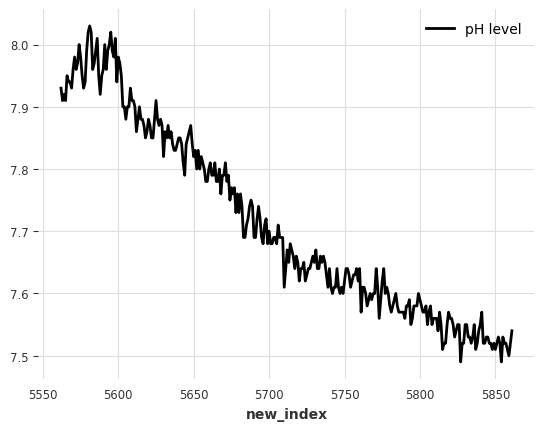

In [2]:
filtered_ph_temp_df = pd.read_csv('new feeds pH falling values.csv', usecols = ['new_index','temp','ph'])

series_pH = TimeSeries.from_dataframe(filtered_ph_temp_df, "new_index", "ph")
series_pH = fill_missing_values(series_pH, fill='auto')

series_pH.plot(label = 'pH level')
plt.legend();

### Perform standard scaling

- Really important when dealing with time series data (especially in our case) to scale it because of how small our values can get

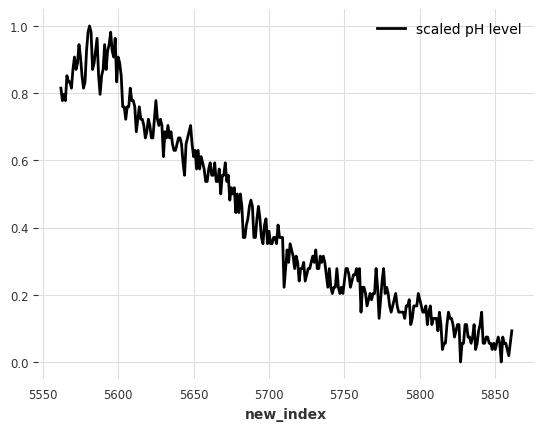

In [3]:
from darts.dataprocessing.transformers import Scaler
scaler_pH = Scaler()
series_pH_scaled = scaler_pH.fit_transform(series_pH);

series_pH_scaled.plot(label = 'scaled pH level')
plt.legend();

### Make deep learning models

- Pretty much this is the part where I experiment the hyperparameters of the models
- I used 80-20 split (80% training set, 20% testing set). 70-30 and 60-40 splits perform worse when I conducted them.
- Hyperparameters used
    - **input_chunk_length** - length of the input sequence fed to the model (I usually split this to 67% of the validation split's length).
    - **output_chunk_length** - length of the forecast of the model (usually 33% of the validation split's length).
    - **random_state** - controls the randomness
    - **n_rnn_layers** - number of recurrent layers. I tried playing with the n_rnn_layers through all three RNN models, ranging from 1 to 15, and the accuracy randomly varies.

In [4]:
from darts.models import NBEATSModel, RNNModel
from darts.metrics import mape, rmse, mase
from darts.utils.model_selection import train_test_split

train_pH, test_pH = train_test_split(series_pH_scaled, test_size=0.20)
NBEATS_pH = NBEATSModel(input_chunk_length=round(len(test_pH)*0.67), output_chunk_length=round(len(test_pH)*0.33), random_state = 0)
LSTM_pH = RNNModel(model="LSTM", training_length=len(test_pH), input_chunk_length=round(len(test_pH)*0.67), random_state = 0, n_rnn_layers = 12)
GRU_pH = RNNModel(model="GRU", training_length=len(test_pH), input_chunk_length=round(len(test_pH)*0.67), random_state = 0, n_rnn_layers = 12)
RNN_pH = RNNModel(model="RNN", training_length=len(test_pH), input_chunk_length=round(len(test_pH)*0.67), random_state = 0, n_rnn_layers = 12)

c:\Programming\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Train the models using fit and predict functions

- **fit()** will fit/train the model on the given series.
- **predict** will predict n time steps following the end of the training series.
    - n can be set to a greater number than the given length of the testing set
- This part can be very tedious because of how long it runs. 

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.3 M 
---------------------------------------------------
6.3 M     Trainable params
1.5 K     Non-trainable params
6.3 M     Total params
25.296    Total estimated model params size (MB)


Epoch 99: 100%|██████████| 6/6 [00:00<00:00, 10.06it/s, train_loss=0.00164]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 6/6 [00:00<00:00, 10.05it/s, train_loss=0.00164]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 60.0 K
4 | V             | Linear           | 26    
---------------------------------------------------
60.0 K    Trainable params
0         Non-trainable params
60.0 K    Total params
0.240     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 6/6 [00:01<00:00,  5.54it/s, train_loss=0.00288]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 6/6 [00:01<00:00,  5.54it/s, train_loss=0.00288]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 45.0 K
4 | V             | Linear           | 26    
---------------------------------------------------
45.0 K    Trainable params
0         Non-trainable params
45.0 K    Total params
0.180     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 6/6 [00:00<00:00,  6.05it/s, train_loss=0.00199]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 6/6 [00:00<00:00,  6.04it/s, train_loss=0.00199]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 15.0 K
4 | V             | Linear           | 26    
---------------------------------------------------
15.0 K    Trainable params
0         Non-trainable params
15.0 K    Total params
0.060     Total estimated model params size (MB)



Epoch 99: 100%|██████████| 6/6 [00:00<00:00, 14.99it/s, train_loss=0.00187]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 6/6 [00:00<00:00, 14.95it/s, train_loss=0.00187]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 37.57it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 21.64it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 21.44it/s]


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 37.26it/s]
RMSE = 0.04


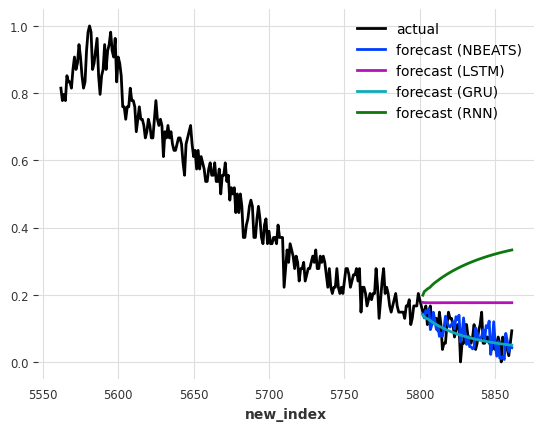

In [5]:
NBEATS_pH.fit(train_pH, verbose=True)
LSTM_pH.fit(train_pH, verbose=True)
GRU_pH.fit(train_pH, verbose=True)
RNN_pH.fit(train_pH, verbose=True)

NBEATSpred_pH = NBEATS_pH.predict(n=len(test_pH), series=train_pH)
LSTMpred_pH = LSTM_pH.predict(n=len(test_pH), series=train_pH)
GRUpred_pH = GRU_pH.predict(n=len(test_pH), series=train_pH)
RNNpred_pH = RNN_pH.predict(n=len(test_pH), series=train_pH)

series_pH_scaled.plot(label='actual')
NBEATSpred_pH.plot(label='forecast (NBEATS)')
LSTMpred_pH.plot(label='forecast (LSTM)')
GRUpred_pH.plot(label='forecast (GRU)')
RNNpred_pH.plot(label='forecast (RNN)')
plt.legend();

### Measure the accuracy of each model using MASE and RMSE

In [8]:
print('MASE (NBEATS) = {:.3f}'.format(mase(test_pH, NBEATSpred_pH, train_pH)))
print('RMSE (NBEATS) = {:.5f}'.format(rmse(test_pH, NBEATSpred_pH)))

print('MASE (LSTM) = {:.3f}'.format(mase(test_pH, LSTMpred_pH, train_pH)))
print('RMSE (LSTM) = {:.5f}'.format(rmse(test_pH, LSTMpred_pH)))

print('MASE (GRU) = {:.3f}'.format(mase(test_pH, GRUpred_pH, train_pH)))
print('RMSE (GRU) = {:.5f}'.format(rmse(test_pH, GRUpred_pH)))

print('MASE (RNN) = {:.3f}'.format(mase(test_pH, RNNpred_pH, train_pH)))
print('RMSE (RNN) = {:.5f}'.format(rmse(test_pH, RNNpred_pH)))

MASE (NBEATS) = 0.949
RMSE (NBEATS) = 0.03902
MASE (LSTM) = 2.612
RMSE (LSTM) = 0.09925
MASE (GRU) = 0.679
RMSE (GRU) = 0.03029
MASE (RNN) = 5.729
RMSE (RNN) = 0.21097
